<a href="https://colab.research.google.com/github/hazelkimhyejin/DEMO/blob/main/CT2011_Lab_01_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vienna Hotels**


## **Import CSV file**

Information about the variables:
* hotel_id: Hotel ID
* price: price per night on a particular day
* stars: hotel rating
* rating_tripadvisor: User rating on Trip Advisor
* rating_website: User rating on hotel website
* distance_fr_citycentre1: Distance from City Centre 1 (in km) (in km)
* accomodation_type: Type of accomodation eg. hotel etc.




In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# read the relevant csv file
path = 'https://raw.githubusercontent.com/timcyku/ct2011/refs/heads/main/hotelsvienna.csv'

df = pd.read_csv(path)

In [73]:
df

,hotel_id,price,stars,rating_tripadvisor,rating_website,distance_fr_citycentre1,distance_fr_citycentre2,accommodation_type
0,21894,81,4.0,4.5,4.4,2.7,4.4,Apartment
1,21897,81,4.0,3.5,3.9,1.7,3.8,Hotel
2,21901,85,4.0,3.5,3.7,1.4,2.5,Hotel
3,21902,83,3.0,4.0,4.0,1.7,2.5,Hotel
4,21903,82,4.0,3.5,3.9,1.2,2.8,Hotel
...,...,...,...,...,...,...,...,...
317,22403,73,3.0,3.0,3.4,1.5,4.0,Hotel
318,22404,109,3.0,3.0,5.0,1.5,3.8,Apartment
319,22406,185,5.0,4.0,4.3,0.8,3.6,Hotel
320,22407,100,4.0,4.5,4.4,1.0,3.7,Hotel


## **Task 1: Plot histograms (in terms of percentage, with 10 bins) for the distribution of distance of the hotels (regardless of accomodation types) from**

* citycentre1
* citycentre2


<Axes: xlabel='distance_fr_citycentre1', ylabel='Probability'>

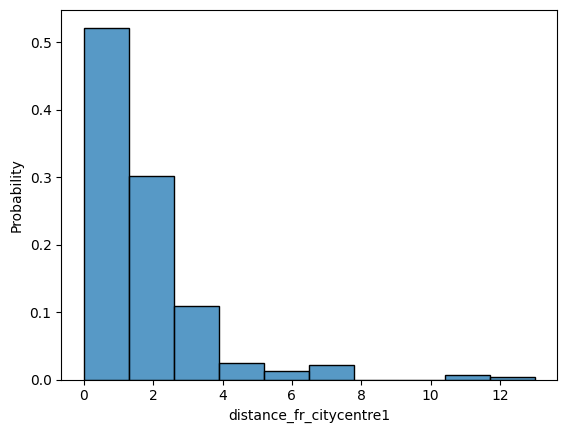

In [74]:
sns.histplot(df, x='distance_fr_citycentre1', bins = 10, stat='probability')

<Axes: xlabel='distance_fr_citycentre2', ylabel='Probability'>

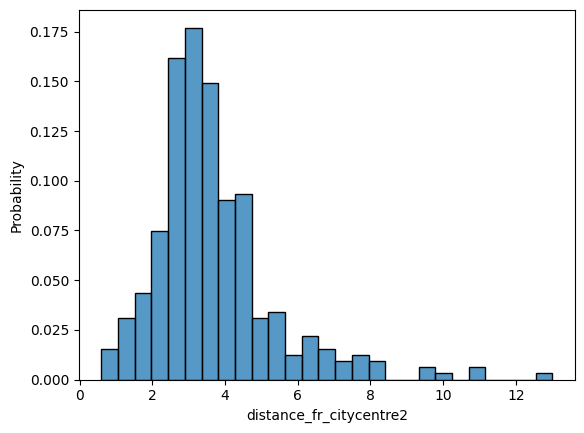

In [75]:
sns.histplot(df, x='distance_fr_citycentre2', stat ='probability')

## **Task 2: Create a new column to classify the hotels based on distances from the city centres.**

The new variable will be named **'closeness'**, where

* closeness = 0 if distance_fr_citycentre1 + distance_fr_citycentre2 < 4.
* closeness = 1 if 4<= distance_fr_citycentre1 + distance_fr_citycentre2 < 8.
* closeness = 2 if distance_fr_citycentre1 + distance_fr_citycentre2 >= 8.


In [76]:
# create the new column

In [77]:
for idx, r in df.iterrows():
  total_distance = r['distance_fr_citycentre1'] + r['distance_fr_citycentre2']
  if total_distance < 4:
    df.at[idx, 'closeness'] = 0 #closeness is 0
  elif 4 <= total_distance < 8:
    df.at[idx, 'closeness'] = 1 #closeness is 1
  else: # total_distance >= 8
    df.at[idx, 'closeness'] = 2 #closeness is 2

## **Task 3: Create the boxplots for the distribution of prices by 'closeness', i.e. for each category of closeness, generate a boxplot of the hotel prices.**

In [78]:
# create the boxplots

<Axes: ylabel='closeness'>

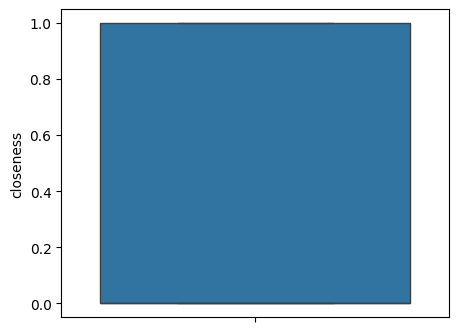

In [79]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df['closeness']==0)

<Axes: ylabel='closeness'>

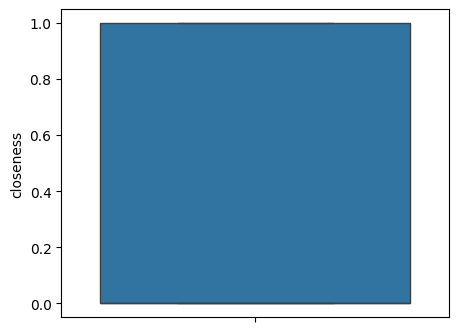

In [81]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df['closeness']==1)

<Axes: ylabel='closeness'>

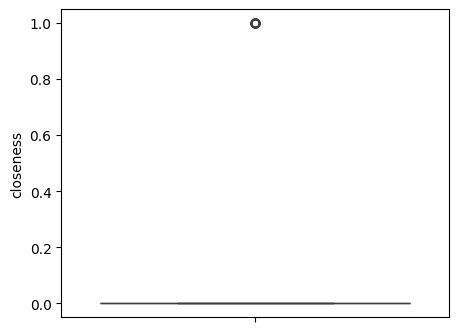

In [82]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df['closeness']==2)

## **Task 4: Create a new dataframe with the following columns:**

* hotel_id
* rating_tripadvisor
* rating_website
* rating_diff  = rating_tripadvisor - rating website

In [99]:
# create the new dataframe

In [100]:
df = df[['hotel_id','rating_tripadvisor','rating_website']]

In [101]:
df

,hotel_id,rating_tripadvisor,rating_website
0,21894,4.5,4.4
1,21897,3.5,3.9
2,21901,3.5,3.7
3,21902,4.0,4.0
4,21903,3.5,3.9
...,...,...,...
317,22403,3.0,3.4
318,22404,3.0,5.0
319,22406,4.0,4.3
320,22407,4.5,4.4


In [102]:
df['rating_diff'] = df['rating_tripadvisor'] - df['rating_website']

In [91]:
df

,hotel_id,rating_tripadvisor,rating_website
0,21894,4.5,4.4
1,21897,3.5,3.9
2,21901,3.5,3.7
3,21902,4.0,4.0
4,21903,3.5,3.9
...,...,...,...
317,22403,3.0,3.4
318,22404,3.0,5.0
319,22406,4.0,4.3
320,22407,4.5,4.4


## **Task 5: Plot the histogram (in percentage, with 20 bins) for rating_diff and compute the following statistics for rating_diff:**

* Mean
* Standard deviation
* 25th percentile
* 50th percentile
* 75th percentile


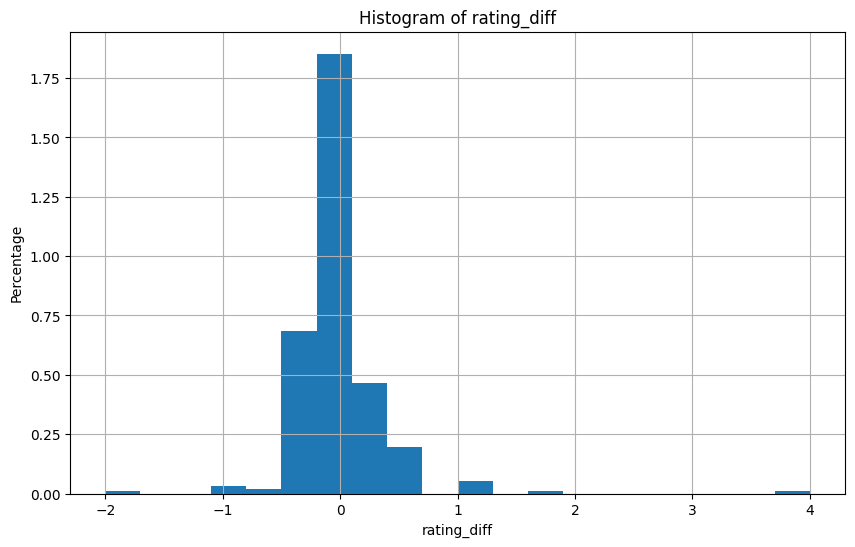

Mean: -0.03
Standard Deviation: 0.39
25th Percentile: -0.20
50th Percentile (Median): 0.00
75th Percentile: 0.10


In [108]:
# Calculate statistics
mean_rating_diff = df['rating_diff'].mean()
std_dev_rating_diff = df['rating_diff'].std()
percentile_25 = df['rating_diff'].quantile(0.25)
percentile_50 = df['rating_diff'].quantile(0.50) # Median
percentile_75 = df['rating_diff'].quantile(0.75)

# Plot histogram
plt.figure(figsize=(10, 6))
df['rating_diff'].hist(bins=20, density=True) # density=True for percentage-based histogram
plt.title('Histogram of rating_diff')
plt.xlabel('rating_diff')
plt.ylabel('Percentage')
plt.show()

# Print statistics
print(f"Mean: {mean_rating_diff:.2f}")
print(f"Standard Deviation: {std_dev_rating_diff:.2f}")
print(f"25th Percentile: {percentile_25:.2f}")
print(f"50th Percentile (Median): {percentile_50:.2f}")
print(f"75th Percentile: {percentile_75:.2f}")

In [109]:
print(df.columns)

Index(['hotel_id', 'rating_tripadvisor', 'rating_website', 'rating_diff'], dtype='object')


In [ ]:
# Create the new dataframe with specified columns
new_df = df[['hotel_id', 'rating_tripadvisor', 'rating_website']].copy()